In [1]:
import numpy as np
import pandas as pd
# import plotly.express as px
# import plotly.offline as py
# import plotly.graph_objs as go
# import plotly.tools as tls
# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# import warnings
# warnings.filterwarnings("ignore")
# import ast
# from wordcloud import WordCloud
# from collections import Counter

## Data

In [2]:
# Read the csv file into a pandas DataFrame and display count of columns and rows
# --------------------------------------------------------------------------------
model_data = pd.read_csv("../Resources/data/model_data.csv")
print(model_data.shape)

(3000, 70)


Note: Pandas dataframe.skew() function returns unbiased skew over requested axis Normalized by N-1. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.

In [3]:
# Apply the pandas `.skew()` function to find skewness of the dataframe. 
# --------------------------------------------------------------------------------
pd.DataFrame(model_data.skew().sort_values(ascending=False)).head(10)

,0
TV Movie,54.772256
popularity,14.377407
Foreign,9.689092
Western,8.176113
keyword_dystopia,6.177296
keyword_aftercreditsstinger,6.087914
keyword_biography,5.919186
Documentary,5.616419
keyword_violence,5.290485
War,5.202071


## Data Exploration

In [4]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3000 non-null   int64  
 1   belongs_to_collection         604 non-null    object 
 2   budget                        3000 non-null   int64  
 3   genres                        3000 non-null   object 
 4   homepage                      946 non-null    object 
 5   imdb_id                       3000 non-null   object 
 6   original_language             3000 non-null   object 
 7   original_title                3000 non-null   object 
 8   overview                      2992 non-null   object 
 9   popularity                    3000 non-null   float64
 10  poster_path                   2999 non-null   object 
 11  production_companies          3000 non-null   object 
 12  production_countries          3000 non-null   object 
 13  rel

In [5]:
model_data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      0
homepage                 2054
                         ... 
Fantasy                     0
War                         0
Western                     0
History                     0
TV Movie                    0
Length: 70, dtype: int64

In [6]:
model_data.describe()

,id,budget,popularity,runtime,revenue,popularity2,rating,totalVotes,sequel,release_year,...,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,TV Movie
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,2.253133e+07,8.463274,107.854000,6.672585e+07,7.713484,6.115900,897.203667,0.201333,1999.713000,...,0.033333,0.156333,0.096667,0.075000,0.010333,0.077333,0.033333,0.014333,0.044000,0.000333
std,866.169729,3.702609e+07,12.104000,22.079293,1.375323e+08,5.105137,1.512808,1768.776157,0.401063,15.423313,...,0.179535,0.363232,0.295553,0.263435,0.101143,0.267164,0.179535,0.118881,0.205129,0.018257
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1921.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06,4.564250,5.800000,65.000000,0.000000,1993.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07,7.271000,6.400000,263.000000,0.000000,2004.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07,9.857500,7.000000,852.250000,0.000000,2011.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,45.153000,9.000000,18931.000000,1.000000,2017.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Histogram

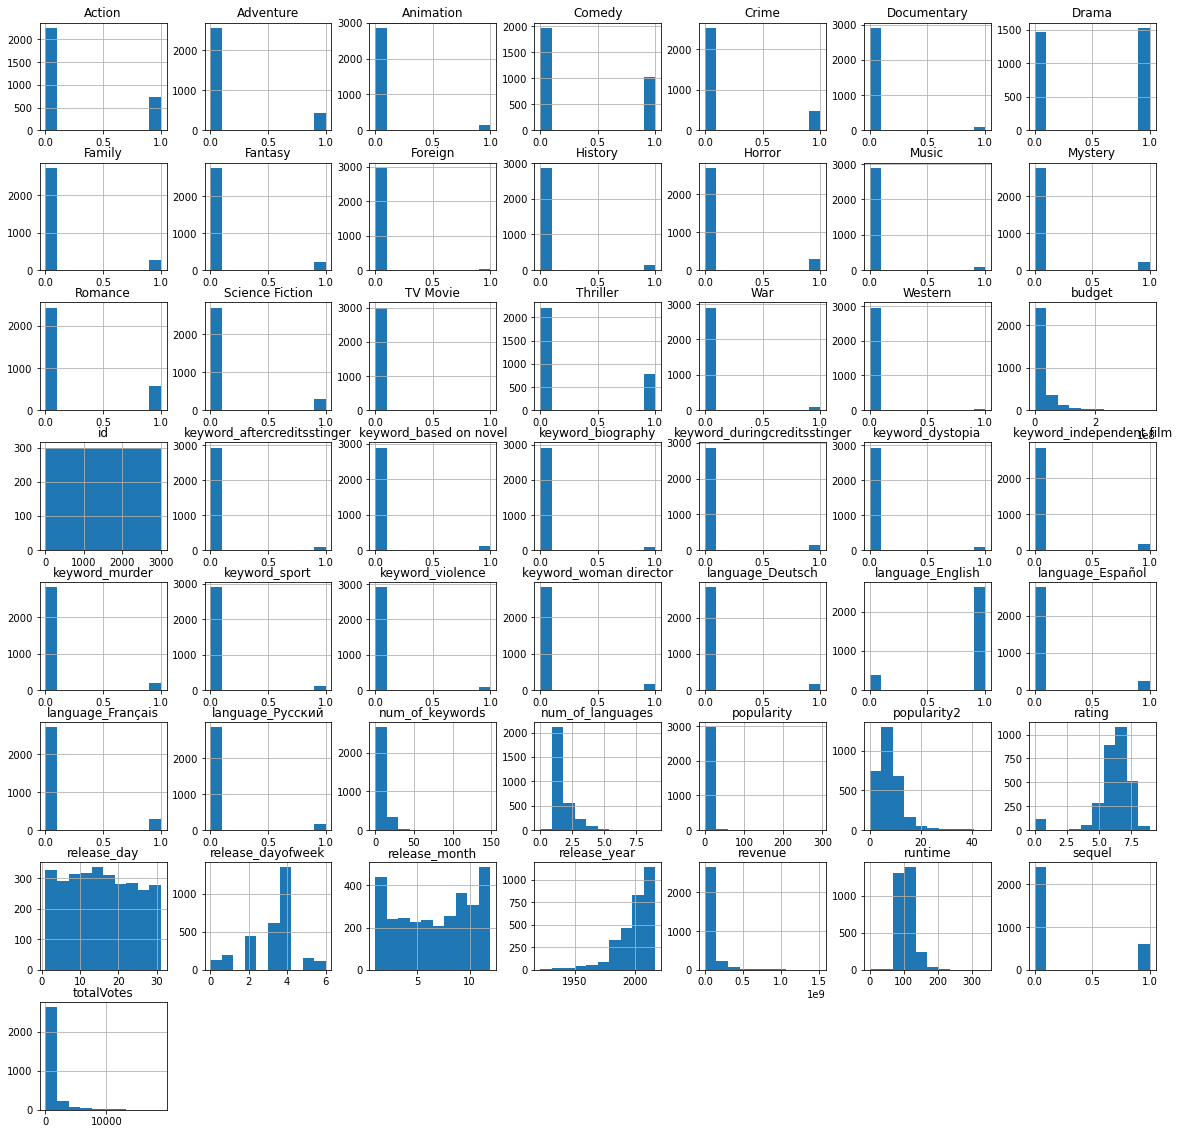

In [7]:
model_data.hist(figsize=(20, 20))
plt.show()

## Corelation Plot

In [8]:
corr_df = model_data[['imdb_id','title','genres','popularity','popularity2',
                        'production_companies','production_countries','status','cast', 'crew', 'budget','revenue',
                         'rating', 'totalVotes', 'sequel', 'release_year','runtime','num_of_keywords','num_of_languages']]

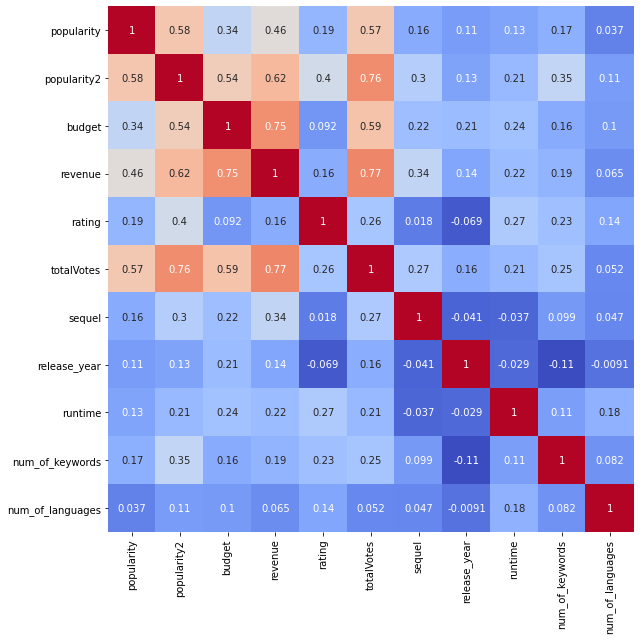

In [9]:
plt.figure(figsize=(15, 9))
corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), square=True, annot=True, cbar=False,cmap='coolwarm')
plt.tight_layout()

In [10]:
# corr_matrix['revenue'].sort_values(ascending=False)
corr_matrix['budget'].sort_values(ascending=False)

budget              1.000000
revenue             0.752965
totalVotes          0.590819
popularity2         0.542509
popularity          0.342356
runtime             0.238410
sequel              0.222932
release_year        0.213915
num_of_keywords     0.155771
num_of_languages    0.101914
rating              0.091976
Name: budget, dtype: float64

## Data Preprocessing

### Preparing the Y axis

In [11]:
#Y axis on 'revenue'(Do we need to create a 1 for revenue over the median revenue and a 0 for any revenue below for model??)
# -----------------------------------------------------------------------------------------------
model_data['average_revenue'] = np.where(model_data['revenue'] >1700000, 1, 0)

In [12]:
#Y axis on 'totalVotes'
# -----------------------------------------------------------------------------------------------
model_data['total_votes'] = np.where(model_data['totalVotes'] >263, 1, 0)

In [13]:
#Y axis on 'popularity2'
# -----------------------------------------------------------------------------------------------
model_data['popularity_rating'] = np.where(model_data['popularity2'] >8, 1, 0)

In [14]:
#Y axis on 'rating'
# -----------------------------------------------------------------------------------------------
model_data['average_rating'] = np.where(model_data['rating'] >6, 1, 0)

In [15]:

# -----------------------------------------------------------------------------------------------
model_data.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,Foreign,Fantasy,War,Western,History,TV Movie,average_revenue,total_votes,popularity_rating,average_rating
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,['Comedy'],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0,0,0,0,0,0,1,1,1,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"['Comedy', 'Drama', 'Family', 'Romance']",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0,0,0,0,0,0,1,1,1,1


### Preparing the X axis

In [16]:
# X axis made up of Budget, Runtime, Genre and Language
# -----------------------------------------------------------------------------------------------
model_df1 = model_data[['budget','runtime','Comedy', 'Drama', 
                                'Family', 'Romance', 'Thriller','Action', 'Animation', 'Adventure', 
                                'Horror','Music','Crime', 'Science Fiction', 'Mystery', 'Fantasy', 'War','History',
                                 'language_English','language_Français', 'language_Español', 'language_Deutsch',
                                 'language_Pусский']]

In [17]:

# -----------------------------------------------------------------------------------------------
model_df1.dtypes

budget                 int64
runtime              float64
Comedy                 int64
Drama                  int64
Family                 int64
Romance                int64
Thriller               int64
Action                 int64
Animation              int64
Adventure              int64
Horror                 int64
Music                  int64
Crime                  int64
Science Fiction        int64
Mystery                int64
Fantasy                int64
War                    int64
History                int64
language_English       int64
language_Français      int64
language_Español       int64
language_Deutsch       int64
language_Pусский       int64
dtype: object

## Modelling

### Multiple Linear Regression

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Assign the data to X and y
# -----------------------------------------------------------------------------------------------
X = model_df1
y = model_data['average_revenue'].values.reshape(-1, 1)
# y = model_data['total_votes'].values.reshape(-1, 1)
# y = model_data['popularity_rating'].values.reshape(-1, 1)
# y = model_data['average_rating'].values.reshape(-1, 1)
print(X.shape, y.shape)

(3000, 23) (3000, 1)


In [20]:
# Use train_test_split to create training and testing data
# -----------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=42)

In [21]:

# -----------------------------------------------------------------------------------------------

x_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)
x_train_scaled = x_scaler.transform(X_train)
y_train_scaled = y_scaler.transform(y_train)

x_test_scaled = x_scaler.transform(X_test)
y_test_scaled = y_scaler.transform(y_test)

In [22]:
# Fit the model to the training data and calculate the scores for the training and testing data
# -----------------------------------------------------------------------------------------------
model = LinearRegression()
model.fit(x_train_scaled, y_train_scaled)
training_score = model.score(x_train_scaled, y_train_scaled)
testing_score = model.score(x_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.15335085436385743
Testing Score: 0.13608708195647667


Text(0.5, 1.0, 'Residual Plot')

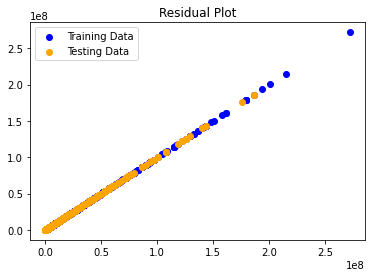

In [23]:
# Plot the Residuals for the Training and Testing data
# -----------------------------------------------------------------------------------------------
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [24]:
#Save MRL model
# -----------------------------------------------------------------------------------------------
# pickle.dump(model, open('../Resources/model_mlrrev.pkl','wb')) #Y on Revenue
# pickle.dump(model, open('../Resources/model_mlrtot.pkl','wb')) #Y on TotalVotes
# pickle.dump(model, open('../Resources/model_mlrpop.pkl','wb')) #Y on Popularity
# pickle.dump(model, open('../Resources/model_mlrrat.pkl','wb')) #Y on Rating

### Support Vector Classification Machines

https://scikit-learn.org/stable/modules/svm.html

In [25]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
import pandas as pd
import numpy as np
import os

In [26]:
# Assign the data to X and y
# -----------------------------------------------------------------------------------------------
X = model_df1
y = model_data['average_revenue'].values.reshape(-1, 1)
# y = model_data['total_votes'].values.reshape(-1, 1)
# y = model_data['popularity_rating'].values.reshape(-1, 1)
# y = model_data['average_rating'].values.reshape(-1, 1)

print(X.shape, y.shape)

(3000, 23) (3000, 1)


In [27]:
# Use train_test_split to create training and testing data
# -----------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [28]:

# -----------------------------------------------------------------------------------------------
x_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)
x_train_scaled = x_scaler.transform(X_train)
y_train_scaled = y_scaler.transform(y_train)

x_test_scaled = x_scaler.transform(X_test)
pickle.dump(x_scaler, open('../Resources/scaler.pkl','wb'))
y_test_scaled = y_scaler.transform(y_test)

In [29]:
# Support vector machine linear classifier
# -----------------------------------------------------------------------------------------------
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(x_train_scaled, y_train)

c:\users\alysh\anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [30]:
# Model Accuracy
# -----------------------------------------------------------------------------------------------
print('Test Acc: %.3f' % model.score(x_test_scaled, y_test))

Test Acc: 0.785


In [31]:
# Calculate classification report
# -----------------------------------------------------------------------------------------------
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       137
           1       0.77      1.00      0.87       463

    accuracy                           0.77       600
   macro avg       0.39      0.50      0.44       600
weighted avg       0.60      0.77      0.67       600



In [32]:
# Save SVC Model. **All SVC Models are currently saved to the Resources directory**
# -----------------------------------------------------------------------------------------------
# pickle.dump(model, open('../Resources/model_svcrev.pkl','wb'))
# pickle.dump(model, open('../Resources/model_svctot.pkl','wb'))
# pickle.dump(model, open('../Resources/model_svcpop.pkl','wb'))
# pickle.dump(model, open('../Resources/model_svcrat.pkl','wb'))